# Day 2 - Working with and plotting data with Pandas and Matplotlib (3.5 Hours)
- Refresh on Session 1 accomplishments
- Continue with Session 1 materials 
- Introduction to data loading, manipulation, and analysis with Pandas (1 hour)
    - What is Pandas
    - Introduction to DataFrames
    - Loading data tables
    - Viewing data in Pandas
    - Navigating within DataFrames
    - Data operations and transformations (e.g., adding columns based on operations)
    - Merging multiple CSV files into the same DataFrame
    - Data analysis and statistics using Pandas (e.g., basic statistics)
    - Export files
- Introduction to data visualization and plotting with Pandas and Matplotlib - (1 hour)
	- What is Matplotlib
	- Matplotlib syntax and layout
	- How to create plots (histograms, scatter plots and best fit lines, bar charts, line plots)
- Questions (15-30 minutes)
	
  __________________________________________________

# Pandas library

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels. 

- It allows us to clean data, wrangle data, make visualisation amongst many other things.

Many people think of Pandas as a Excel on steroids - most of the tasks you can do in Pandas you can do in Excel, and vice versa. However, pandas has some key benefits to Excel including:
- Size limitations: Excel handles ~ 1 million rows, Pandas can handle millions and millions
- Complex data manipulation: Excel workbooks can crash easily because of complex computations, Pandas handles these much much better.
- Automation: Excel has VBA to automate some tasks, but Pandas can connect to hundreds of other libraries geared for automation.
- Cross platform: Excel for Windows and for Mac are similar but not identical.

### Accessing Pandas

In order for us to use Pandas, we have to import the Pandas library. We can import it tw ways:

1. Import pandas
  - We're then able to use the functions within pandas by typing `pandas.some_function`
2. Import pandas as pd
  - Here we are importing pandas and using the alias pd. This allows us to access the functions in the by just typing in `pd.some_function`

The second way is the more common way, it's allows for cleaner code and faster coding.

In [1]:
# This is how you import pandas
import pandas as pd

# You've now imported the pandas library!

### Data strcutures in Pandas: DataFrames and Series
The two main data structures in Pandas are:
1. Series - 1D arrays (single column)
2. DataFrame - 2D arrays (multi-column)

DataFrames are the most common data structure in Pandas is the `DataFrame`. It's the equivalent of an Excel spreadsheet. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

More specifically a `DataFrame` is a 2D array structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays).

DataFrames have rows and columns (called `Series`). The name of the columns will be on top, and left side of the data frame you'll see the index. By default, Python index is 0-based and will begin counting at zero.

To make it easier, let's look at a `DataFrame`

In [ ]:
#First we're going to access the data in the google drive folder. 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#here we are actually creating a Dataframe called df from a csv file (we'll get to this later)
oo=pd.read_csv('gdrive/My Drive/Session 2/Data/olympics.csv', skiprows=4)
oo # printing out the df so we can see it.

City  Edition      Sport       Discipline               Athlete  \
0       Athens     1896   Aquatics         Swimming         HAJOS, Alfred   
1       Athens     1896   Aquatics         Swimming      HERSCHMANN, Otto   
2       Athens     1896   Aquatics         Swimming     DRIVAS, Dimitrios   
3       Athens     1896   Aquatics         Swimming    MALOKINIS, Ioannis   
4       Athens     1896   Aquatics         Swimming    CHASAPIS, Spiridon   
...        ...      ...        ...              ...                   ...   
29211  Beijing     2008  Wrestling  Wrestling Gre-R        ENGLICH, Mirko   
29212  Beijing     2008  Wrestling  Wrestling Gre-R  MIZGAITIS, Mindaugas   
29213  Beijing     2008  Wrestling  Wrestling Gre-R       PATRIKEEV, Yuri   
29214  Beijing     2008  Wrestling  Wrestling Gre-R         LOPEZ, Mijain   
29215  Beijing     2008  Wrestling  Wrestling Gre-R        BAROEV, Khasan   

       NOC Gender                       Event Event_gender   Medal  
0      HUN    Men              100m freestyle            M    Gold  
1      AUT    Men              100m freestyle            M  Silver  
2      GRE    Men  100m freestyle for sailors            M  Bronze  
3      GRE    Men  100m freestyle for sailors            M    Gold  
4      GRE    Men  100m freestyle for sailors            M  Silver  
...    ...    ...                         ...          ...     ...  
29211  GER    Men                   84 - 96kg            M  Silver  
29212  LTU    Men                  96 - 120kg            M  Bronze  
29213  ARM    Men                  96 - 120kg            M  Bronze  
29214  CUB    Men                  96 - 120kg            M    Gold  
29215  RUS    Men                  96 - 120kg            M  Silver  

[29216 rows x 10 columns]

Here we can see simply by typing the name of the dataframe `oo` Pandas shows us that DataFrame. You can also see that Pandas is showing several several rows from the beginning of the DataFrame and then several from the end of the DataFrame.

We'll do more with this.

**Let's discuss this dataframe. **

- This dataframe is made up of multiple `series` - a `series` is a one dimensional array of indexed data. 

- The first column in our dataframe is the called the `index`, after that each of the other columns are called series. You can see that our next series is the "City" column.

- Each of the rows is also a series
  - So how to we access the series? We can use the built in functions in Pandas.

In [ ]:
# Let's access the first series - the column called "City"
oo['City']

0         Athens
1         Athens
2         Athens
3         Athens
4         Athens
          ...   
29211    Beijing
29212    Beijing
29213    Beijing
29214    Beijing
29215    Beijing
Name: City, Length: 29216, dtype: object

In [ ]:
# We can access another way too, however this way only works if there are no spaces in the series name
oo.City

0         Athens
1         Athens
2         Athens
3         Athens
4         Athens
          ...   
29211    Beijing
29212    Beijing
29213    Beijing
29214    Beijing
29215    Beijing
Name: City, Length: 29216, dtype: object

In [ ]:
# We can access multiple series by using a list.
oo[["City", "Edition"]]

City  Edition
0       Athens     1896
1       Athens     1896
2       Athens     1896
3       Athens     1896
4       Athens     1896
...        ...      ...
29211  Beijing     2008
29212  Beijing     2008
29213  Beijing     2008
29214  Beijing     2008
29215  Beijing     2008

[29216 rows x 2 columns]

In [ ]:
#To confirm what we are seeing, let's look at the data types.
print(type(oo)) # This should be a DataFame because it's a 2D array
print(type(oo["City"])) #This should be a series because it's a 1D array

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Reading data into Pandas

Ok so we've gotten a basic understanding of the two key data structures in Pandas, now let's focus on getting data into Pandas and using Pandas to assess that data.

Pandas has functions built in to read data from:
- excel using `pd.read_excel(...)`
- csv using `pd.read_csv(...)`
- json using `pd.read_json(...)`
- sql using `pd.read_sql_table(...)`

We'll continue with the file we've been using and once again read that our data from csv.

The `pd.read_csv` function has lots of built in features and allows us to use differnet paramters to control how and what data we read from that csv. You can specify things like what column headings to use, additional delimeter information, or how to parse data.

We'll focus on a few essentials:

- The most essential argument you pass to `read_csv()` is the filepath:
  - `pd.read_csv(filepath...,)`
- Another key argument that you can add is the skip rows feature:
  - `pd.read_csv(filepath...,skiprows=None,...)`

- Besides giving `read_csv` areguments, you need to tell pandas what you want to read that data to, that's why we include the feature `oo=` before. It does not have to be `oo` it could be anything you'd like to name your Dataframe. The most commonly used one is `df=`

In [ ]:
#Let's read that our data file again
df=pd.read_csv('gdrive/My Drive/Session 2/Data/olympics.csv')
df # printing out the df so we can see it.

List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event  \
0                                                    NaN                                                 
1      DISCLAIMER: The IOC Research and Reference Ser...                                                 
2                                                    NaN                                                 
3                                                   City                                                 
4                                                 Athens                                                 
...                                                  ...                                                 
29215                                            Beijing                                                 
29216                                            Beijing                                                 
29217                                            Beijing                                                 
29218                                            Beijing                                                 
29219                                            Beijing                                                 

      Unnamed: 1 Unnamed: 2       Unnamed: 3            Unnamed: 4 Unnamed: 5  \
0            NaN        NaN              NaN                   NaN        NaN   
1            NaN        NaN              NaN                   NaN        NaN   
2            NaN        NaN              NaN                   NaN        NaN   
3        Edition      Sport       Discipline               Athlete        NOC   
4           1896   Aquatics         Swimming         HAJOS, Alfred        HUN   
...          ...        ...              ...                   ...        ...   
29215       2008  Wrestling  Wrestling Gre-R        ENGLICH, Mirko        GER   
29216       2008  Wrestling  Wrestling Gre-R  MIZGAITIS, Mindaugas        LTU   
29217       2008  Wrestling  Wrestling Gre-R       PATRIKEEV, Yuri        ARM   
29218       2008  Wrestling  Wrestling Gre-R         LOPEZ, Mijain        CUB   
29219       2008  Wrestling  Wrestling Gre-R        BAROEV, Khasan        RUS   

      Unnamed: 6      Unnamed: 7    Unnamed: 8 Unnamed: 9  
0            NaN             NaN           NaN        NaN  
1            NaN             NaN           NaN        NaN  
2            NaN             NaN           NaN        NaN  
3         Gender           Event  Event_gender      Medal  
4            Men  100m freestyle             M       Gold  
...          ...             ...           ...        ...  
29215        Men       84 - 96kg             M     Silver  
29216        Men      96 - 120kg             M     Bronze  
29217        Men      96 - 120kg             M     Bronze  
29218        Men      96 - 120kg             M       Gold  
29219        Men      96 - 120kg             M     Silver  

[29220 rows x 10 columns]

In [ ]:
#As you can see the file appears very strange - this is because the file actually as multiple rows of headers (4 in fact)
#Let's reread the file but exclude the first 4 rows.

df=pd.read_csv('gdrive/My Drive/Session 2/Data/olympics.csv', skiprows=4)
df # printing out the df so we can see it.

City  Edition      Sport       Discipline               Athlete  \
0       Athens     1896   Aquatics         Swimming         HAJOS, Alfred   
1       Athens     1896   Aquatics         Swimming      HERSCHMANN, Otto   
2       Athens     1896   Aquatics         Swimming     DRIVAS, Dimitrios   
3       Athens     1896   Aquatics         Swimming    MALOKINIS, Ioannis   
4       Athens     1896   Aquatics         Swimming    CHASAPIS, Spiridon   
...        ...      ...        ...              ...                   ...   
29211  Beijing     2008  Wrestling  Wrestling Gre-R        ENGLICH, Mirko   
29212  Beijing     2008  Wrestling  Wrestling Gre-R  MIZGAITIS, Mindaugas   
29213  Beijing     2008  Wrestling  Wrestling Gre-R       PATRIKEEV, Yuri   
29214  Beijing     2008  Wrestling  Wrestling Gre-R         LOPEZ, Mijain   
29215  Beijing     2008  Wrestling  Wrestling Gre-R        BAROEV, Khasan   

       NOC Gender                       Event Event_gender   Medal  
0      HUN    Men              100m freestyle            M    Gold  
1      AUT    Men              100m freestyle            M  Silver  
2      GRE    Men  100m freestyle for sailors            M  Bronze  
3      GRE    Men  100m freestyle for sailors            M    Gold  
4      GRE    Men  100m freestyle for sailors            M  Silver  
...    ...    ...                         ...          ...     ...  
29211  GER    Men                   84 - 96kg            M  Silver  
29212  LTU    Men                  96 - 120kg            M  Bronze  
29213  ARM    Men                  96 - 120kg            M  Bronze  
29214  CUB    Men                  96 - 120kg            M    Gold  
29215  RUS    Men                  96 - 120kg            M  Silver  

[29216 rows x 10 columns]

Now let's look at several of the key functions to use to validate and do a quick look at your DataFrame.
- `Shape` returns the dimensions of your Dataframe
- `Head` returns the first(n) rows of your Dataframe.
- `Tail` returns the last(n) rows of your DataFrame

In [ ]:
df.shape

#Result shows that we have 29216 rows and 10 columns

(29216, 10)

In [ ]:
# Note you have () because it's expecting n values, if you leave blank it defaults to first 5 rows
df.head()

#Try entering a value into the ()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [ ]:
# Note you have () because it's expecting n values, if you leave blank it defaults to last 5 rows
df.tail()

#Try entering a value into the ()

City  Edition      Sport       Discipline               Athlete  \
29211  Beijing     2008  Wrestling  Wrestling Gre-R        ENGLICH, Mirko   
29212  Beijing     2008  Wrestling  Wrestling Gre-R  MIZGAITIS, Mindaugas   
29213  Beijing     2008  Wrestling  Wrestling Gre-R       PATRIKEEV, Yuri   
29214  Beijing     2008  Wrestling  Wrestling Gre-R         LOPEZ, Mijain   
29215  Beijing     2008  Wrestling  Wrestling Gre-R        BAROEV, Khasan   

       NOC Gender       Event Event_gender   Medal  
29211  GER    Men   84 - 96kg            M  Silver  
29212  LTU    Men  96 - 120kg            M  Bronze  
29213  ARM    Men  96 - 120kg            M  Bronze  
29214  CUB    Men  96 - 120kg            M    Gold  
29215  RUS    Men  96 - 120kg            M  Silver

`info()` provides a summary of the dataframe including number of entries, datatype, and number of non null entries for each series in the data frame. This is very helpful when working with realworld data. Let's have a look.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


### Basic data analysis in Pandas

Let's load another open source dataset

The original location of the Titanic dataset is [here](https://www.openml.org/d/40945). 

We will use [this version](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv) that has been cleaned up a bit. For more information, go [here](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html) to familiarize yourself with the data labels.


In [ ]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head() #note we are using df.head() to look at the first 5 rows. This is a nice practice!

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [ ]:
#Let's look at some key information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Now let's use some simple but powerful the simple but powerful `df.describe` function in pandas to get an intial look at our data.

In [ ]:
df.describe()
#Difference between info and describe is that info gives you information on the
# datafile, describe gives you simple descriptive stats on data in the file

Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max                   6.000000  512.32920

As you can see, with one line of code, we've assessed some key statistics in our dataset! 

To reinforce how powerful Pandas (and lots of libaries) is, let's use another single line of code to plot some data.

Let's plot a histogram of the age of passengers of the Titanic.

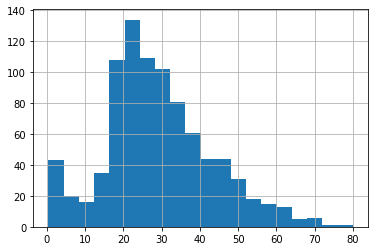

In [ ]:
#Here we are point to our dataframe, our series "Age"
#We're also passing the histogram argument and asking for 20 bins.
df.Age.hist(bins=20)

Try changing the value of bins in the code above!

### Navigating within Dataframes

A key way to navigate within a Dataframe is called indexing.
- An index object is an immutable array
- indexing allows you to access a row or column, even using a label



In [ ]:
#Let's read that olympics data file again
df=pd.read_csv('gdrive/My Drive/Session 2/Data/olympics.csv', skiprows=4)
df.head() # printing out the df so we can see it.

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [ ]:
# indexes are their own data type
type(df.index)

pandas.core.indexes.range.RangeIndex

We discussed earlier that a key feature of Pandas is that you can use a label as an index. 

Let's look at an example and use the `pd.set_index()` function.
- Curerntly our dataframe is using the default index of row number. What if we wanted to use the Athlete "label" to index instead?

In [ ]:
# We can use the set_index function to change our
df.set_index('Athlete')

City  Edition      Sport       Discipline  NOC  \
Athlete                                                                   
HAJOS, Alfred          Athens     1896   Aquatics         Swimming  HUN   
HERSCHMANN, Otto       Athens     1896   Aquatics         Swimming  AUT   
DRIVAS, Dimitrios      Athens     1896   Aquatics         Swimming  GRE   
MALOKINIS, Ioannis     Athens     1896   Aquatics         Swimming  GRE   
CHASAPIS, Spiridon     Athens     1896   Aquatics         Swimming  GRE   
...                       ...      ...        ...              ...  ...   
ENGLICH, Mirko        Beijing     2008  Wrestling  Wrestling Gre-R  GER   
MIZGAITIS, Mindaugas  Beijing     2008  Wrestling  Wrestling Gre-R  LTU   
PATRIKEEV, Yuri       Beijing     2008  Wrestling  Wrestling Gre-R  ARM   
LOPEZ, Mijain         Beijing     2008  Wrestling  Wrestling Gre-R  CUB   
BAROEV, Khasan        Beijing     2008  Wrestling  Wrestling Gre-R  RUS   

                     Gender                       Event Event_gender   Medal  
Athlete                                                                       
HAJOS, Alfred           Men              100m freestyle            M    Gold  
HERSCHMANN, Otto        Men              100m freestyle            M  Silver  
DRIVAS, Dimitrios       Men  100m freestyle for sailors            M  Bronze  
MALOKINIS, Ioannis      Men  100m freestyle for sailors            M    Gold  
CHASAPIS, Spiridon      Men  100m freestyle for sailors            M  Silver  
...                     ...                         ...          ...     ...  
ENGLICH, Mirko          Men                   84 - 96kg            M  Silver  
MIZGAITIS, Mindaugas    Men                  96 - 120kg            M  Bronze  
PATRIKEEV, Yuri         Men                  96 - 120kg            M  Bronze  
LOPEZ, Mijain           Men                  96 - 120kg            M    Gold  
BAROEV, Khasan          Men                  96 - 120kg            M  Silver  

[29216 rows x 9 columns]

In [ ]:
#let's take a look at the dataframe with the .head() function
df.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

Here we can see that even though we set the index to athlete, when we actually look at our dataframe with `.head()` it reverted back.

This is because if you want to actually lock the original dataframe to that new indexing, you need to add the `inplace` argument - otherwise you are just doing it temporarily.

In [ ]:
df.set_index('Athlete', inplace=True)
df.head()

City  Edition     Sport Discipline  NOC Gender  \
Athlete                                                                
HAJOS, Alfred       Athens     1896  Aquatics   Swimming  HUN    Men   
HERSCHMANN, Otto    Athens     1896  Aquatics   Swimming  AUT    Men   
DRIVAS, Dimitrios   Athens     1896  Aquatics   Swimming  GRE    Men   
MALOKINIS, Ioannis  Athens     1896  Aquatics   Swimming  GRE    Men   
CHASAPIS, Spiridon  Athens     1896  Aquatics   Swimming  GRE    Men   

                                         Event Event_gender   Medal  
Athlete                                                              
HAJOS, Alfred                   100m freestyle            M    Gold  
HERSCHMANN, Otto                100m freestyle            M  Silver  
DRIVAS, Dimitrios   100m freestyle for sailors            M  Bronze  
MALOKINIS, Ioannis  100m freestyle for sailors            M    Gold  
CHASAPIS, Spiridon  100m freestyle for sailors            M  Silver

Let's say you weren't happy with this you can use `reset_index` which will set the index back to it's default interger indexing.

In [ ]:
df.reset_index(inplace=True)
df.head()

Athlete    City  Edition     Sport Discipline  NOC Gender  \
0       HAJOS, Alfred  Athens     1896  Aquatics   Swimming  HUN    Men   
1    HERSCHMANN, Otto  Athens     1896  Aquatics   Swimming  AUT    Men   
2   DRIVAS, Dimitrios  Athens     1896  Aquatics   Swimming  GRE    Men   
3  MALOKINIS, Ioannis  Athens     1896  Aquatics   Swimming  GRE    Men   
4  CHASAPIS, Spiridon  Athens     1896  Aquatics   Swimming  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

If you want to maintain your dataframe in the default indexing, but also want another dataframe with the indexing set to "Athlete" we can do that to. 

Rather than using the `inplace=True` comment, we simply create a new dataframe that is our original dataframe with a different index. See below.

In [ ]:
#Create a new dataframe ath which is the previous dataframe but with Althele for the index
ath = df.set_index('Athlete')
ath.head()

City  Edition     Sport Discipline  NOC Gender  \
Athlete                                                                
HAJOS, Alfred       Athens     1896  Aquatics   Swimming  HUN    Men   
HERSCHMANN, Otto    Athens     1896  Aquatics   Swimming  AUT    Men   
DRIVAS, Dimitrios   Athens     1896  Aquatics   Swimming  GRE    Men   
MALOKINIS, Ioannis  Athens     1896  Aquatics   Swimming  GRE    Men   
CHASAPIS, Spiridon  Athens     1896  Aquatics   Swimming  GRE    Men   

                                         Event Event_gender   Medal  
Athlete                                                              
HAJOS, Alfred                   100m freestyle            M    Gold  
HERSCHMANN, Otto                100m freestyle            M  Silver  
DRIVAS, Dimitrios   100m freestyle for sailors            M  Bronze  
MALOKINIS, Ioannis  100m freestyle for sailors            M    Gold  
CHASAPIS, Spiridon  100m freestyle for sailors            M  Silver

Another helpful feature is the `sort_index()` feature, it allows you to sort all the items by a particular index.

Using this function really helps when you have a large dataset and sorting the index cuts down the time it takes to access subsets of that data.

You can sort objects by a label along the axis

In [ ]:
#here we are using our dataframe that was indexed by the Athlete's name
ath.head()

City  Edition     Sport Discipline  NOC Gender  \
Athlete                                                                
HAJOS, Alfred       Athens     1896  Aquatics   Swimming  HUN    Men   
HERSCHMANN, Otto    Athens     1896  Aquatics   Swimming  AUT    Men   
DRIVAS, Dimitrios   Athens     1896  Aquatics   Swimming  GRE    Men   
MALOKINIS, Ioannis  Athens     1896  Aquatics   Swimming  GRE    Men   
CHASAPIS, Spiridon  Athens     1896  Aquatics   Swimming  GRE    Men   

                                         Event Event_gender   Medal  
Athlete                                                              
HAJOS, Alfred                   100m freestyle            M    Gold  
HERSCHMANN, Otto                100m freestyle            M  Silver  
DRIVAS, Dimitrios   100m freestyle for sailors            M  Bronze  
MALOKINIS, Ioannis  100m freestyle for sailors            M    Gold  
CHASAPIS, Spiridon  100m freestyle for sailors            M  Silver

In [ ]:
#Now let's sort by the Athlete's name
ath.sort_index(inplace=True) #inplace=True is used to lock in the change we've made
ath.head()

#you can see that the result is the dataframe organized by the Athlete index.

City  Edition       Sport   Discipline  NOC  \
Athlete                                                                    
AABYE, Edgar                Paris     1900  Tug of War   Tug of War  ZZX   
AALTONEN, Arvo Ossian     Antwerp     1920    Aquatics     Swimming  FIN   
AALTONEN, Arvo Ossian     Antwerp     1920    Aquatics     Swimming  FIN   
AALTONEN, Paavo Johannes   London     1948  Gymnastics  Artistic G.  FIN   
AALTONEN, Paavo Johannes   London     1948  Gymnastics  Artistic G.  FIN   

                         Gender              Event Event_gender   Medal  
Athlete                                                                  
AABYE, Edgar                Men         tug of war            M    Gold  
AALTONEN, Arvo Ossian       Men  200m breaststroke            M  Bronze  
AALTONEN, Arvo Ossian       Men  400m breaststroke            M  Bronze  
AALTONEN, Paavo Johannes    Men       pommel horse            M    Gold  
AALTONEN, Paavo Johannes    Men   team competition            M    Gold

In [ ]:
#We can do the same thing as before by add the argument ascending=False to reverse the order.
ath.sort_index(inplace=True, ascending=False)
ath.head()

#Note, doing this will place special characters lower than regular characters.

City  Edition     Sport Discipline  NOC Gender  \
Athlete                                                                 
ÖSTRAND, Per-Olof  Helsinki     1952  Aquatics   Swimming  SWE    Men   
ÖSTMO, Ole            Paris     1900  Shooting   Shooting  NOR    Men   
ÖSTMO, Ole            Paris     1900  Shooting   Shooting  NOR    Men   
ÖSTMO, Ole            Paris     1900  Shooting   Shooting  NOR    Men   
ÖSTMO, Ole            Paris     1900  Shooting   Shooting  NOR    Men   

                                           Event Event_gender   Medal  
Athlete                                                                
ÖSTRAND, Per-Olof                 400m freestyle            M  Bronze  
ÖSTMO, Ole         army rifle, 300m, 3 positions            M  Bronze  
ÖSTMO, Ole                      free rifle, team            M  Silver  
ÖSTMO, Ole            army rifle, 300m, standing            M  Silver  
ÖSTMO, Ole               army rifle, 300m, prone            M  Bronze

You can search by labels within a data frame using `loc[]`
- loc[] is a label based indexer for selection by label
- loc[] will raise a KeyError when the item isn't found

Let's use `loc[]` to find someone in our data set.

In [ ]:
#making sure our dataframe is indexed to Athlete and ordered normally
ath.sort_index(inplace=True)


#We can use this feature to search for all indexes that have Bolt, Usain
ath.loc['BOLT, Usain'] 



City  Edition      Sport Discipline  NOC Gender         Event  \
Athlete                                                                         
BOLT, Usain  Beijing     2008  Athletics  Athletics  JAM    Men          200m   
BOLT, Usain  Beijing     2008  Athletics  Athletics  JAM    Men  4x100m relay   
BOLT, Usain  Beijing     2008  Athletics  Athletics  JAM    Men          100m   

            Event_gender Medal  
Athlete                         
BOLT, Usain            M  Gold  
BOLT, Usain            M  Gold  
BOLT, Usain            M  Gold

`loc[]` is an index-based meaning your dataframe as to be indexed by the labels you will be searching. 

Another way to search the dataframe is using `iloc[]` which is an integer based.
- `iloc[]` allows for the more traditional Python style indexing and slicing like we did with lists.

In [ ]:
#Let's read that olympics data file again that has the default index
df=pd.read_csv('gdrive/My Drive/Session 2/Data/olympics.csv', skiprows=4)
df.head() # printing out the df so we can see it.

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [ ]:
#we can simply search for location 1700 and return the information
df.iloc[1700]

#one of the nice things about iloc[] is that it renders a table similar 
# to a details on demand in spotfire

City                   London
Edition                  1908
Sport                 Sailing
Discipline            Sailing
Athlete         RABOT, Pierre
NOC                       FRA
Gender                    Men
Event                      6m
Event_gender                X
Medal                  Bronze
Name: 1700, dtype: object

In [ ]:
#we can also use a list in iloc[]
df.iloc[[1500, 2100, 7700]]

City  Edition       Sport   Discipline              Athlete  NOC  \
1500     London     1908  Gymnastics  Artistic G.        LEFDAHL, Rolf  NOR   
2100  Stockholm     1912   Athletics    Athletics  MCGRATH, Matthew J.  USA   
7700     London     1948    Football     Football     TOMASEVIC, Kosta  YUG   

     Gender             Event Event_gender   Medal  
1500    Men  team competition            M  Silver  
2100    Men      hammer throw            M    Gold  
7700    Men          football            M  Silver

In [ ]:
#we can also use traditional searching in iloc[]
df.iloc[1:4] #Searching for indexes 1 through but not including 4

City  Edition     Sport Discipline             Athlete  NOC Gender  \
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   

                        Event Event_gender   Medal  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold

### Data operations and transformations

There are many operations we can do with Pandas, so let's have a look at some them!

One of the most important is the `Groupby` function. It does three main thnigs:
- Splits a dataframe into groups based on some criteria
- Apply a function to each group independently
- Combines results into a new dataframe

Let's take a look at this functionality and use a new dataset of USGS Cores. This file has been provided for you but you could also collect it from: [USGS CRC](https://my.usgs.gov/crcwc/).

In [ ]:
#Let's load in a new dataset of USGS Cores.
cores=pd.read_csv('gdrive/My Drive/Session 2/Data/USGS_cores.csv')
cores.head() # printing out the df so we can see it.cores=pd.read_csv()

Twn Num Twn Dir  Rng Num Rng Dir   Sec Quarter Lib Num       API Num  \
0     27.0       N      9.0       W  25.0  NWNESE    U308           NaN   
1     24.0       S      6.0       E  30.0      NE    V019           NaN   
2     45.0       N     92.0       W  19.0  SWSESE    T963  4.904305e+09   
3     28.0       N     65.0       W  26.0    NENE    T631           NaN   
4      0.0     NaN      0.0     NaN   0.0     NaN    T255           NaN   

                          Operator                  Well Name  ...    County  \
0                  WESTERN NUCLEAR       1 BM - BLUE MOUNTAIN  ...  COCONINO   
1  NURE (BENDIX FIELD ENGINEERING)              SAN RAFAEL 13  ...     EMERY   
2                 OHIO OIL COMPANY                 1 STROTHRS  ...  WASHAKIE   
3                EXXON CORPORATION  1 EMP - EXXON MCCANN PASS  ...    GOSHEN   
4                   EXXON MINERALS                  2 WARWICK  ...    ORANGE   

  Photos Thin Sec Analysis   Latitude   Longitude       Formation      Age  \
0      F        F        F  35.694978 -113.185162         UNKNOWN     PERM   
1      F        F        T  38.697700 -111.283980  DRILL CUTTINGS  UNKNOWN   
2      F        F        F  43.848510 -107.931450        FRONTIER     CRET   
3      F        T        T  42.376490 -104.618300         UNKNOWN     UNKN   
4      F        F        T  41.225500  -74.358330         UNKNOWN      NaN   

   Min Depth Max Depth  
0          0      1000  
1          1      1000  
2       7102      8099  
3         74      1065  
4         14      1002  

[5 rows x 23 columns]

In [ ]:
#Let's take a quick look at what's in the dataset
cores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16531 entries, 0 to 16530
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Twn Num        16219 non-null  float64
 1   Twn Dir        16176 non-null  object 
 2   Rng Num        16218 non-null  float64
 3   Rng Dir        16175 non-null  object 
 4   Sec            16212 non-null  float64
 5   Quarter        14145 non-null  object 
 6   Lib Num        16531 non-null  object 
 7   API Num        13102 non-null  float64
 8   Operator       16527 non-null  object 
 9   Well Name      16529 non-null  object 
 10  Field          14571 non-null  object 
 11  Type           16072 non-null  object 
 12  State          16451 non-null  object 
 13  County         16530 non-null  object 
 14  Photos         16531 non-null  object 
 15  Thin Sec       16531 non-null  object 
 16  Analysis       16531 non-null  object 
 17  Latitude       16374 non-null  float64
 18  Longit

In [ ]:
#Let's use Groupby:
cores.groupby('State') #does the groupby
list(cores.groupby('State')) #if we wanted to do the groupby and see the list of data

#Looking below you can see that groupby object is first the State and then all the rows corresponding to that state. 
#If you scroll down you'll see the next State.

[('AK',
         Twn Num Twn Dir  Rng Num Rng Dir   Sec Quarter Lib Num       API Num  \
  501        4.0       N     14.0       E   9.0      NE    F002  5.022320e+09   
  2062       1.0       N     11.0       W  23.0     NaN    E835  5.011910e+09   
  2124       2.0       N      6.0       W   2.0     NaN    E856  5.011910e+09   
  2147       7.0       N     34.0       W  25.0     NaN    E766  5.029710e+09   
  2148       1.0       N      3.0       E  20.0     NaN    E846  5.028710e+09   
  ...        ...     ...      ...     ...   ...     ...     ...           ...   
  15792     20.0       N     12.0       E  16.0     NaN    T061           NaN   
  16035      8.0       N      5.0       W  34.0      NE    E727  5.027920e+09   
  16499     37.0       S     59.0       W  20.0     NaN    T827  5.006120e+09   
  16504     50.0       S     76.0       W  35.0     NaN    T230  5.021120e+09   
  16509     14.0       N      4.0       W  16.0      NW    T798  5.010320e+09   
  
                 

We can `iterate` through groups! Let's loop through some groupby objects

In [ ]:
for group_key, group_value in cores.groupby("State"):
  print(group_key)
  print(group_value)

AK
       Twn Num Twn Dir  Rng Num Rng Dir   Sec Quarter Lib Num       API Num  \
501        4.0       N     14.0       E   9.0      NE    F002  5.022320e+09   
2062       1.0       N     11.0       W  23.0     NaN    E835  5.011910e+09   
2124       2.0       N      6.0       W   2.0     NaN    E856  5.011910e+09   
2147       7.0       N     34.0       W  25.0     NaN    E766  5.029710e+09   
2148       1.0       N      3.0       E  20.0     NaN    E846  5.028710e+09   
...        ...     ...      ...     ...   ...     ...     ...           ...   
15792     20.0       N     12.0       E  16.0     NaN    T061           NaN   
16035      8.0       N      5.0       W  34.0      NE    E727  5.027920e+09   
16499     37.0       S     59.0       W  20.0     NaN    T827  5.006120e+09   
16504     50.0       S     76.0       W  35.0     NaN    T230  5.021120e+09   
16509     14.0       N      4.0       W  16.0      NW    T798  5.010320e+09   

                Operator              Well Name 

The `groupby` function is also great for performing operation such as statistical analyses on groups of data in a data frame.

Some common already built in ones are:
- `GroupBy.size()` size includes the total length of an object (includes `NaNs`)
- `GroupBy.count()` (does NOT include `Nans`)
- `GroupBy.mean()`
- `GroupBy.max() Goupby.min()`
- `GroupBy.agg()` - this is powerful!

`GroubBy.agg()` lets you perform multipe statistics in one calculation per group.


In [ ]:
#We can use this to see the number of cores we have per state
cores.groupby("State").size()

#Alaska has 823 while Colorado has 2925

State
AK     763
AL       2
AR       6
AZ     176
CA     186
CO    2763
FL       8
IA       3
ID      21
IN       4
KS     281
KY       2
LA       3
MI       6
MO      29
MT    2411
NC      17
ND    1217
NE     490
NJ       5
NM     419
NV      55
NY       2
OH       6
OK      82
OR       7
PA       4
SD      78
TX      44
UT     797
WA     199
WV       3
WY    5801
dtype: int64

In [ ]:
#We can group by multiple objects to see how many cores are penetrate each Formation in each state.
cores.groupby(['State', 'Formation']).size()

State  Formation       
AK     ARGILLITE           5
       BASEMENT            1
       EILEEN              1
       IVISHAK /SH /SD/    1
       KINGAK              3
                          ..
WY     WILLOW CREEK        1
       WIND RIVER          3
       WINNIPEG            1
       WOLFCAMP            1
       WYODAK              1
Length: 945, dtype: int64

In [ ]:
#We can mimic the concept of a cross table in Spotfire with groupby, 
# multiple columns, and using the aggregate function to look at multiple metrics
cores.groupby(['State', 'Formation']).agg(['min', 'max', 'count'])

Twn Num             Rng Num               Sec        \
                           min   max count     min   max count   min   max   
State Formation                                                              
AK    ARGILLITE           19.0  21.0     5    13.0  14.0     5   7.0  32.0   
      BASEMENT            14.0  14.0     1     2.0   2.0     1  19.0  19.0   
      EILEEN               NaN   NaN     0     NaN   NaN     0   NaN   NaN   
      IVISHAK /SH /SD/     NaN   NaN     0     NaN   NaN     0   NaN   NaN   
      KINGAK              19.0  21.0     3    13.0  14.0     3   7.0  32.0   
...                        ...   ...   ...     ...   ...   ...   ...   ...   
WY    WILLOW CREEK        39.0  39.0     1    79.0  79.0     1   1.0   1.0   
      WIND RIVER           2.0   4.0     3     3.0   3.0     3  14.0  16.0   
      WINNIPEG            57.0  57.0     1    78.0  78.0     1  11.0  11.0   
      WOLFCAMP            16.0  16.0     1    66.0  66.0     1  13.0  13.0   
      WYODAK              51.0  51.0     1    73.0  73.0     1  34.0  34.0   

                             Lib Num  ... Latitude   Longitude              \
                       count     min  ...    count         min         max   
State Formation                       ...                                    
AK    ARGILLITE            5    E897  ...        5 -155.733562 -155.364440   
      BASEMENT             1    E898  ...        1 -151.717183 -151.717183   
      EILEEN               0    E921  ...        1 -150.427820 -150.427820   
      IVISHAK /SH /SD/     0    E921  ...        1 -150.427820 -150.427820   
      KINGAK               3    E897  ...        3 -155.733562 -155.364440   
...                      ...     ...  ...      ...         ...         ...   
WY    WILLOW CREEK         1    S513  ...        1 -106.280230 -106.280230   
      WIND RIVER           3    D381  ...        3 -108.531990 -108.491490   
      WINNIPEG             1    C520  ...        1 -106.223990 -106.223990   
      WOLFCAMP             1    B144  ...        1 -104.726660 -104.726660   
      WYODAK               1    E929  ...        1 -105.623980 -105.623980   

                             Min Depth                Max Depth                 
                       count       min      max count       min      max count  
State Formation                                                                 
AK    ARGILLITE            5    4005.0   6982.0     5    4015.0   7002.0     5  
      BASEMENT             1   11520.0  11520.0     1   11538.0  11538.0     1  
      EILEEN               1    8079.0   8079.0     1    8115.0   8115.0     1  
      IVISHAK /SH /SD/     1    8115.0   8115.0     1    8192.0   8192.0     1  
      KINGAK               3    2940.0   5866.0     3    2980.0   5874.0     3  
...                      ...       ...      ...   ...       ...      ...   ...  
WY    WILLOW CREEK         1    1688.0   1688.0     1    1794.0   1794.0     1  
      WIND RIVER           3    3464.0   3930.0     3    3519.0   3961.0     3  
      WINNIPEG             1   11860.0  11860.0     1   11970.0  11970.0     1  
      WOLFCAMP             1   11193.0  11193.0     1   11268.0  11268.0     1  
      WYODAK               1     571.0    571.0     1     662.0    662.0     1  

[945 rows x 42 columns]

In [ ]:
#Let's use a cobimnation of loc to call all the values, but only see select columns
# rembmer when we were in lists the ':' notation allows us to call all rows
#We're also including the head(10) to only see the first 10 rows 
cores.loc[:,['API Num','State', 'Formation', 'Max Depth', 'Min Depth']].head(10)

API Num State    Formation  Max Depth  Min Depth
0  4.301530e+09    UT  KAIBAB /LM/     5207.0     5147.0
1  3.306100e+09    ND        RIVAL     8108.0     8047.0
2  5.045600e+08    CO    MESAVERDE     4956.0     4870.0
3  5.045600e+08    CO    MESAVERDE     5500.0     5485.0
4  5.045600e+08    CO    MESAVERDE     5581.0     5551.0
5  5.045600e+08    CO    MESAVERDE     6568.0     6390.0
6  5.045600e+08    CO    MESAVERDE     7388.0     7080.0
7  5.045600e+08    CO     COZZETTE     7907.0     7823.0
8  5.045065e+08    CO    MESAVERDE     4921.0     4887.0
9  5.045065e+08    CO    MESAVERDE     6528.0     6431.0

In [ ]:
# We can use this function to very quickly organize our dataframe in and
# create a new data from from it. 
df2=cores.loc[:,['API Num','State', 'Formation', 'Max Depth', 'Min Depth']]

Now let's use Pandas to add perform some column-based operations and add a column. Let's say we want to calculate the thickness from the Min and Max Depths of the cores.

In [ ]:
# make the variable called 'th' that 
# is the result of subtracting the Min Depth from the Max Depth column

th=cores['Max Depth']-cores['Min Depth'] 

# assign the 'th' variable to a new column in dataframe called thickness
cores['Thickness']=th 

#now let's use the view we were looking at before but add our new column!
cores.loc[:,['API Num','State', 'Formation', 'Max Depth', 'Min Depth', 'Thickness']].head(10)

API Num State       Formation  Max Depth  Min Depth  Thickness
0           NaN    AZ         UNKNOWN       1000          0       1000
1           NaN    UT  DRILL CUTTINGS       1000          1        999
2  4.904305e+09    WY        FRONTIER       8099       7102        997
3           NaN    WY         UNKNOWN       1065         74        991
4           NaN    NY         UNKNOWN       1002         14        988
5           NaN    NM          MANCOS       2676       1689        987
6           NaN    AZ         UNKNOWN       1738        753        985
7           NaN    CO         UNKNOWN        995         10        985
8           NaN    WA    SKOOKUMCHUCK        993          9        984
9           NaN    UT         UNKNOWN        980          0        980

In [ ]:
cores.Thickness.describe()

count    15969.000000
mean        75.510865
std        125.194216
min          1.000000
25%         20.000000
50%         40.000000
75%         61.000000
max       1000.000000
Name: Thickness, dtype: float64

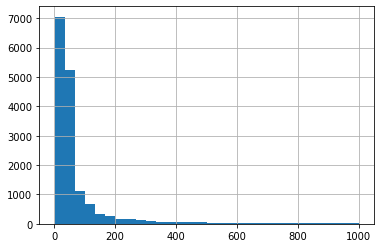

In [ ]:
#Let's use a built in pandas plot to look at a histogram of thicknesses
cores.Thickness.hist(bins=30)

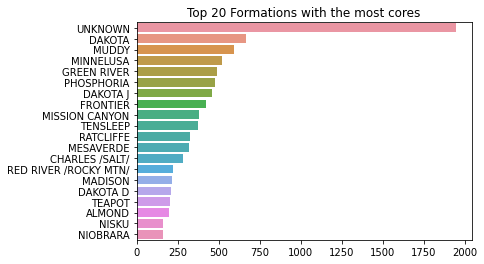

In [ ]:
#let's import a two more libraries we'll get to know to make nicer figures
import seaborn as sns
import matplotlib.pyplot as plt

#calculate the number of cores we have per formation
counts=cores['Formation'].value_counts() #pandas function

#create a chart from seaborn...we'll get into this later
sns.barplot(y=counts.index[0:20], x=counts.values[0:20])
plt.title('Top 20 Formations with the most cores')
plt.show()

### Merging data with Pandas

Let's build on more concepts of Pandas and learn how to merge multiple files into a single dataframe and do more analyses.

There are many ways to merge, join, and rearrange data into dataframes in Pandas, this is one of the great things about it. 

To find lots of excellent information on all the ways you can merge and join data in Pandas, here is some helpful [reading](https://pandas.pydata.org/docs/user_guide/merging.html)

In [ ]:
#We're going to import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#First we're going to access the data in the google drive folder. 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let' load in a well and look at the dataframe

In [ ]:
# Let's load some data from a well that was saved as a csv
df1 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/shankle.csv")
df1.head()

Facies Formation Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       2     A1 SH   SHANKLE  2774.5  98.36      0.642      -0.1  18.685   
1       2     A1 SH   SHANKLE  2775.0  97.57      0.631       7.9  16.745   
2       2     A1 SH   SHANKLE  2775.5  98.41      0.615      12.8  14.105   
3       2     A1 SH   SHANKLE  2776.0  85.92      0.597      13.0  13.385   
4       2     A1 SH   SHANKLE  2776.5  83.16      0.592      12.3  13.345   

    PE  NM_M  RELPOS  
0  2.9     1   1.000  
1  3.2     1   0.984  
2  3.2     1   0.968  
3  3.4     1   0.952  
4  3.4     1   0.935

Now what if we wanted to bring in several more wells that have the same values? 

Let's do this and load them as unique dataframes

In [ ]:
# Here we are creating 7 other unique dataframes for each of the wells in the folder:
df2 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/newby.csv")
df3 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/churchmanbible.csv")
df4 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/crosshcattle.csv")
df5 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/lukegu.csv")
df6 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/nolan.csv")
df7 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/recruitf9.csv")
df8 = pd.read_csv("gdrive/My Drive/Session 2/Data/Wells/shrimplin.csv")

Now what we want to do is merge them all into a single dataframe, just like is shown in this image. This is where the Pandas `concat` function can come in!


![Anatomy of a figure](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)

In [ ]:
#Let's use the concat function to join our dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df['Well Name']

0        SHANKLE
1        SHANKLE
2        SHANKLE
3        SHANKLE
4        SHANKLE
         ...    
466    SHRIMPLIN
467    SHRIMPLIN
468    SHRIMPLIN
469    SHRIMPLIN
470    SHRIMPLIN
Name: Well Name, Length: 3232, dtype: object

To confirm we actually brought in those wells and merged them all into one data frame, let's look at some data. 

How about we look at the `count` of values in each well and plot that:

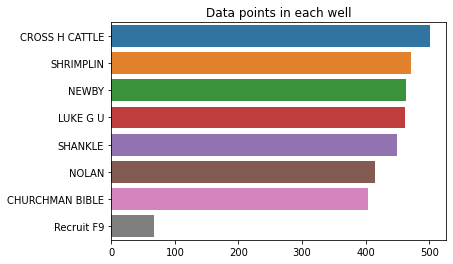

In [ ]:
#calculate the number of points we have per well
counts=df['Well Name'].value_counts()

#plot those values to confirm we have multiple wells in our single dataframe
#we're using seaborn for this, we'll see how to do this later
sns.barplot(y=counts.index[0:20], x=counts.values[0:20])
plt.title('Data points in each well')
plt.show()

### Data transformations with Pandas

### Exporting data from Pandas

Pandas make exporting data like dataframes to different file types just as easy as it is to import files. 

Just like reading,you need to pass a file path you would like the file to go to. There are also lots of options you can include like whether the Pandas-based index will be included in the output.

Let's take a look:

In [ ]:
cores.to_csv('gdrive/My Drive/Session 2/Data/EXPORT.csv')

# Pandas plotting using Matplotlib

## Overview: `matplotlib` and `seaborn`
`Pandas` can call functions from the foundational `Matplotlib` library for figures. `Matplotlib` is a foundation for python plotting, and `seaborn` is a wrapper for `Matplotlib` for stylization and unique visuals. Since you will spend lots of time plotting things to explore datasets and show off your results, these two packages are very, very useful to be familar with. 

In [ ]:
#We're going to import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Mount the google drive folder. 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Let's load some data from a well that was saved as a csv
well = pd.read_csv("gdrive/My Drive/Session 2/Data/RandomWell.csv")
well.head()

DEPTH         GR         DT      RHOB      DRHO      NPHI
0  4610.1008  89.568954  66.223099  2.515450  0.008615  0.070332
1  4610.2008  88.169571  66.705551  2.530982  0.005628  0.065343
2  4610.3008  86.943130  67.237823  2.543377  0.001724  0.066881
3  4610.4008  86.172943  67.531052  2.550319 -0.002829  0.067540
4  4610.5008  86.267899  68.183243  2.555398 -0.006574  0.065946

Now let's take a couple look at some plots built into Pandas but based on Matplotlib (Pandas is calling Matplotlib in the background)

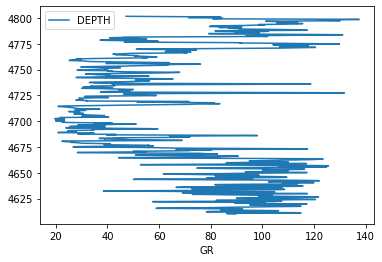

In [ ]:
#We can call the plot function, and pass the arguments for a line plot, 
# and use DEPTH and then 
well.plot(kind = 'line', x = 'GR', y = 'DEPTH')

There are a couple issues with out `plot`
- clearly it's too squished
- the y axis is inverted compared to what we want

let's fix these by passing some `arguments`

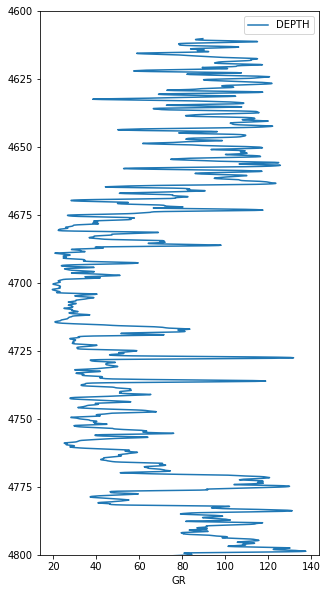

In [ ]:
#Let's use the figsize argument to change the size using figsize
#Let's change the yaxis by using the ylim argument 
well.plot(kind = 'line', x = 'GR', y = 'DEPTH', figsize=(5, 10), ylim=(4800, 4600))

Let's take a look at some plots that will give us more information on the data. How about a scatter plot?

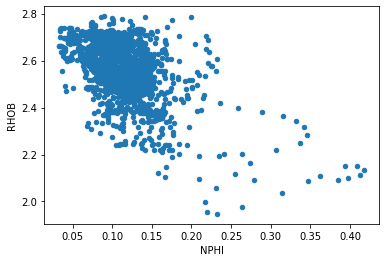

In [ ]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB')

Looks good, and we can see some trends but let's build it by
- adding colors by a third variable

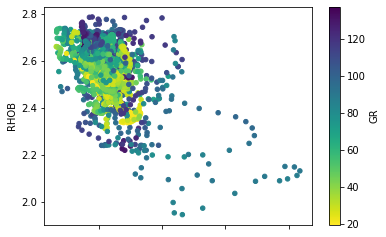

In [ ]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='GR', colormap='viridis_r')



### Matplotlib proper

Matplotlib is a very powerful library capable of producing complex and publication-quality figures with lots of layout control.

Pandas directly calls it's plots from Matplotlib, however if you use Matplotplib library directly you can huge flexibility to make many types of figures!

There are two ways to "use" Matplotlib:
- Matlab approach
- Object-oriented approach

When using the OO approach, it helps to know how the matplotlib structures its plots (see figure below):
- The final plot that we see as the output is a `Figure` object.
- The `Figure` object is the top level container for all the other elements that make up the graphic image. 
- These “other” elements are called `Artists`.
- The `Figure` object can be thought of as a canvas, upon which different `artists` act to create the final graphic image.
- This `Figure` can contain any number of various `artists`.

Look at this figure that describes the **"Anatomy of a Matplotlib figure"** Note in this figure, everything that is blue is an `artist element`

Read this:This article is a great place to [learn about the components of a matplotlib figure\.](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)Here is the key diagram:![Anatomy of a figure](https://matplotlib.org/_images/anatomy.png)

- Again in the figure above, anything in blue is an `Artists`
- `Artists` are basically all the elements that are rendered onto the figure.
- Each plot that we see in a figure, is an `Axes` object. 
- The `Axes` object holds the actual data that we are going to display. It will also contain `X-` and `Y-axis` labels, a `title`.
- Each `Axes` object will contain two or more `Axis` objects.
- The `Axis` objects set the data limits. It also contains the `ticks` and `ticks` labels.

In [ ]:
#Let's import a few things

#importing things for some data manipulation
import pandas as pd
import numpy as np

#importing matplotlib library. Note plt is the alias we'll use
import matplotlib.pyplot as plt

#Mount the google drive folder. 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Let's load some data from a well that was saved as a csv
well = pd.read_csv("gdrive/My Drive/Session 2/Data/RandomWell.csv")
well.head()

DEPTH         GR         DT      RHOB      DRHO      NPHI
0  4610.1008  89.568954  66.223099  2.515450  0.008615  0.070332
1  4610.2008  88.169571  66.705551  2.530982  0.005628  0.065343
2  4610.3008  86.943130  67.237823  2.543377  0.001724  0.066881
3  4610.4008  86.172943  67.531052  2.550319 -0.002829  0.067540
4  4610.5008  86.267899  68.183243  2.555398 -0.006574  0.065946

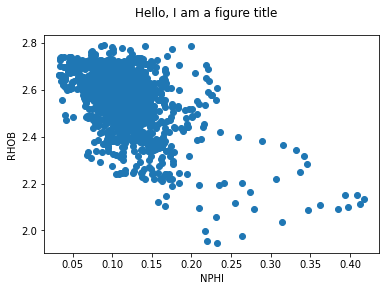

In [ ]:
# It's generally good to set things up this way

# Define a figure object (fig) and the axes (ax)
fig, ax = plt.subplots()

fig.suptitle('Hello, I am a figure title')

# setting the columes you want to use for setting the axes
ax.plot(well['NPHI'], well['RHOB'], 'o')

# Set the label for the x-axis
ax.set_xlabel("NPHI")

# Set the label for the y-axis
ax.set_ylabel("RHOB")

# this cleans stuff up - comment this out to see what happens
plt.show()

Ok let's take a look at combining some data transformations and figures! to quickly analyze a dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let's load in a dataset from the North Sea put together by SPE with lots of porosity and permeability data that was used for comparative relative perm analyses. You can access the dataset [here](https://www.spe.org/web/csp/datasets/set02.htm#download) that also includes permX, permY, permZ 




In [ ]:
folder_path = 'gdrive/My Drive/Session 2/Data/' 
file_name = 'SPERocks.csv' 
df=pd.read_csv(folder_path + file_name, index_col=0) #using the index_col because the data file already included an index column (first column 0). We're just telling Pandas to set the index to the first column
df.head()

poro     perm
0  0.184778  18.2808
1  0.191699  28.5927
2  0.159089  23.8922
3  0.151273  30.6373
4  0.123168  10.7137

In [ ]:
#Let's look at some statistics from that dataset.
df.describe()

poro          perm
count  1.122000e+06  1.122000e+06
mean   1.705968e-01  3.555915e+02
std    9.331767e-02  1.426713e+03
min    0.000000e+00  6.650000e-04
25%    9.505600e-02  3.138730e-01
50%    1.718840e-01  2.044500e+01
75%    2.417370e-01  1.753510e+02
max    5.000000e-01  2.000000e+04

As you can see, it would be helpful to make our permeability log perm.
Let's use a quick NumPy function to do that - we'll look at this in more detail later.

In [ ]:
#Adding a new column by transforming perm to logperm
df["logperm"] = np.log(df["perm"].to_numpy())
df.head()

poro     perm   logperm
0  0.184778  18.2808  2.905851
1  0.191699  28.5927  3.353151
2  0.159089  23.8922  3.173552
3  0.151273  30.6373  3.422218
4  0.123168  10.7137  2.371523

Ok now let's plot that data on a scatter plot.

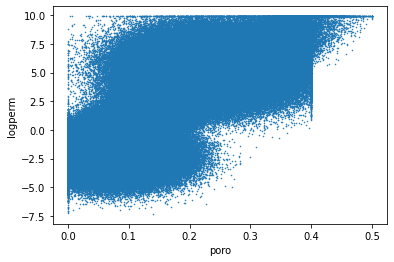

In [ ]:
# poro logperm scatter plot
df.plot.scatter(x="poro",y="logperm", s=0.3) #s indicates the transparency
plt.show()

We seem to have some strange values that are probably cutoffs:
- porosity = 0
- porosity = 0.4
- perm = 20000

Let's remove them:

In [ ]:
#We're only going to include data in our dataframe if they are 
# NOT equal to those erroneous values (!= indicates NOT equal to)

df =df[df['poro'] !=0] #df only includes values NOT equal to 0

df =df[df['poro'] !=0.4] #df only includes NOT equal to exactly

df =df[df['perm'] !=20000]

In [ ]:
# poro logperm scatter plot (of every 100th sample using the ::100 synthax)
df.plot.scatter(x="poro",y="logperm", s=0.3)
plt.show()

Another issue with our plot is that it's pretty busy - there are just too many data points.

A really helpful feature in pandas is the `:` operator to index and slice as we did before.

Specifically we'll be using the `::` operator which allows us only consider or use the nth sample by doing `::n`

In [ ]:
# poro logperm scatter plot (of every 100th sample using the ::100 syntax)
df[::50].plot.scatter(x="poro",y="logperm", s=0.3)
plt.show()

As you can see the `::` operator to look at every 100th point in the dataset really helps clean things up.

We are not removing the data, simply not showing it on this plot. Go ahead and try changing the value in the cell above.

As you can see the data-set seems quite bi-modal, so let's look at some other types of plots to see if we can narrow that down

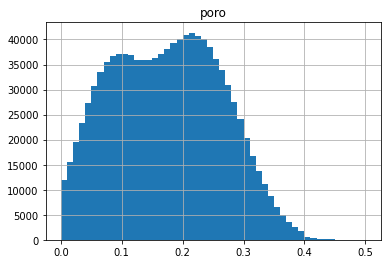

In [ ]:
# Let's create porosity histogram
# you can see what we are passing the argument of 50 bins, 
# go ahead and change that if you want
df[ ["poro"] ].hist(bins=50)
plt.show()

In [ ]:
#Now let's look athe permeability histrogram
df[ ["logperm"] ].hist(bins=200)
plt.show()

#Does it look better with 200 bins?

Rather than making two separate figures, we can use the same line of code and pass in multiple columns and create two unique plots in one figures.

In [ ]:
# create poro perm histograms
df[ ["poro","logperm"] ].hist(bins=50, figsize=(10,4))
plt.show()

Clearly we can see that the porosity distribution has some slight bimodality but there is a discint bimodality in the permeability. 

Why not separate out separate out some facies?

In [ ]:
#Let's create a new dataframe column "facies" that is based on if 
# logperm>=0 then it's labeled 'Sand', otherwise it's 'Shale"
df['facies'] = np.where(df['logperm']>= 0, "Sand", "Shale")
df.head(100)

poro      perm   logperm facies
0   0.184778   18.2808  2.905851   Sand
1   0.191699   28.5927  3.353151   Sand
2   0.159089   23.8922  3.173552   Sand
3   0.151273   30.6373  3.422218   Sand
4   0.123168   10.7137  2.371523   Sand
..       ...       ...       ...    ...
95  0.259863   19.3725  2.963855   Sand
96  0.274558   45.1739  3.810519   Sand
97  0.293287   89.5667  4.494984   Sand
98  0.331688  252.9210  5.533077   Sand
99  0.308116  153.8720  5.036121   Sand

[100 rows x 4 columns]

In [ ]:
# Summanry statistics by facies
print(df[df["facies"]=="Sand"][ ["poro","logperm"] ].describe())
    
    
print(df[df["facies"]=="Shale"][ ["poro","logperm"] ].describe())

                poro        logperm
count  767173.000000  767173.000000
mean        0.215568       4.358728
std         0.073064       2.057087
min         0.000000       0.000090
25%         0.165162       2.879462
50%         0.216046       4.446259
75%         0.265951       5.821518
max         0.500000       9.903488
                poro        logperm
count  354827.000000  354827.000000
mean        0.073365      -2.116089
std         0.046555       1.090877
min         0.000000      -7.315724
25%         0.038274      -2.859839
50%         0.071717      -2.091708
75%         0.105081      -1.313133
max         0.360120      -0.000064


Now let's actually build some plots to show the difference in the porosity and permeability distributions for each of our facies.

Our porosity distributions don't look bad at all! 

Yes, we have a permeability cutoff, but discuss other ways to do that. 

Nevertheless, we just looked at some a pretty helpful and powerful way we can look at data, quickly segment, and then quickly plot!

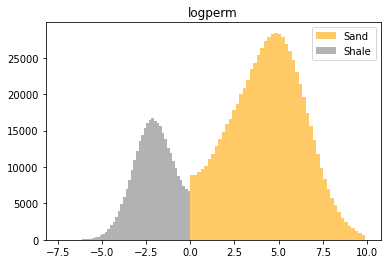

In [ ]:
# plot poro perm histograms colored by facies
plt.hist(df[df["facies"]=="Sand"]["poro"].reset_index(drop=True), alpha=0.6, label="Sand", color="orange", bins=50)
plt.hist(df[df["facies"]=="Shale"]["poro"].reset_index(drop=True), alpha=0.6, label="Shale", color="grey", bins=50)
plt.legend()
plt.title("poro")
plt.show()
 
plt.hist(df[df["facies"]=="Sand"]["logperm"].reset_index(drop=True), alpha=0.6, label="Sand", color="orange", bins=50)
plt.hist(df[df["facies"]=="Shale"]["logperm"].reset_index(drop=True), alpha=0.6, label="Shale", color="grey", bins=50)
plt.legend()
plt.title("logperm")    
plt.show()